In [ ]:
# Import necessary libraries
from keras.preprocessing.image import img_to_array, array_to_img
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import glob
import cv2
import os
from keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Dropout, Dense, Flatten, Input, concatenate
from keras.preprocessing.image import load_img, img_to_array
from babel.numbers import format_currency
from skimage.transform import resize

from google.colab import drive

# Mount Google Drive to access files (for Google Colab)
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
# Load house attributes from the CSV file
file_path = '/content/gdrive/MyDrive/pfa/data.csv'
cols = ["bedrooms", "bathrooms", "area", "zipcode", "price"]

# Use the default separator (comma) and include column headers
df = pd.read_csv(file_path, header=None, names=cols, skiprows=1)

# Display the first few rows for verification
print(df.head())

# Display the data types of each column
print(df.dtypes)

# Display the final number of rows in the DataFrame
final_row_count = len(df)
print("Final number of rows in the DataFrame:", final_row_count)


   bedrooms  bathrooms  area  zipcode   price
1         4        4.0  4053    85255  869500
2         4        3.0  3343    36372  865200
3         3        4.0  3923    85266  889000
4         5        5.0  4022    85262  910000
5         3        4.0  4116    85266  971226
bedrooms       int64
bathrooms    float64
area           int64
zipcode        int64
price          int64
dtype: object
Final number of rows in the DataFrame: 535


In [ ]:
# Preprocessing house attributes
from sklearn.impute import KNNImputer

# List of continuous columns
continuous_columns = ["bedrooms", "bathrooms", "area", "zipcode"]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Convert continuous columns to numeric type
df[continuous_columns] = df[continuous_columns].apply(pd.to_numeric, errors='coerce')

# Create a KNN imputer
imputer = KNNImputer(n_neighbors=2)

# Apply KNN imputation to continuous columns
df[continuous_columns] = imputer.fit_transform(df[continuous_columns])

# Display the first few rows for verification
print(df.head())


   bedrooms  bathrooms    area  zipcode   price
1       4.0        4.0  4053.0  85255.0  869500
2       4.0        3.0  3343.0  36372.0  865200
3       3.0        4.0  3923.0  85266.0  889000
4       5.0        5.0  4022.0  85262.0  910000
5       3.0        4.0  4116.0  85266.0  971226


In [ ]:
# Apply MinMaxScaler to continuous columns
if not df[continuous_columns].empty:
    df[continuous_columns] = scaler.fit_transform(df[continuous_columns])
else:
    print("No data available for MinMaxScaler. Please check your data.")

# Display the first few rows for verification
print(df.head())


   bedrooms  bathrooms      area   zipcode   price
1  0.333333   0.500000  0.377392  0.792924  869500
2  0.333333   0.333333  0.297456  0.000000  865200
3  0.222222   0.500000  0.362756  0.793103  889000
4  0.444444   0.666667  0.373902  0.793038  910000
5  0.222222   0.500000  0.384485  0.793103  971226


In [ ]:
# Select the "price" column and perform scaling
df["price"] = scaler.fit_transform(df[["price"]])

# Display the first few rows for verification
print(df.head())


   bedrooms  bathrooms      area   zipcode     price
1  0.333333   0.500000  0.377392  0.792924  0.145219
2  0.333333   0.333333  0.297456  0.000000  0.144483
3  0.222222   0.500000  0.362756  0.793103  0.148561
4  0.444444   0.666667  0.373902  0.793038  0.152159
5  0.222222   0.500000  0.384485  0.793103  0.162650


In [ ]:
import os
import glob
import cv2
import numpy as np

# Load house images
images = []

# Iterate over houses
for i in df.index.values:
    # Base path for current house images
    basePath = os.path.sep.join(['/content/gdrive/MyDrive/pfa/photos/', "{}_*".format(i + 1)])
    # Find paths to house images
    housePaths = sorted(glob.glob(basePath))

    # Check if no images found for this house
    if not housePaths:
        print(f"No image files found for house {i + 1}")
        continue

    print(f"Number of image paths for house {i + 1}: {len(housePaths)}")

    # Load original images without resizing
    inputImages = [cv2.imread(housePath) for housePath in housePaths]

    print(f"Number of images loaded for house {i + 1}: {len(inputImages)}")

    # Check if any images are missing (at least 4 images are required)
    while len(inputImages) < 4:
        # Duplicate the first image if needed to reach 4 images
        inputImages.append(inputImages[0].copy())

    # Resize each image to size (180, 120) and convert to RGB
    resizedImages = [cv2.cvtColor(cv2.resize(img, (180, 120), interpolation=cv2.INTER_CUBIC), cv2.COLOR_BGR2RGB) for img in inputImages]

    # Create a final image with required size
    outputImage = np.zeros((240, 360, 3), dtype="uint8")

    # Assign resized images to parts of the final image
    outputImage[:120, :180] = resizedImages[0]  # Top-left corner
    outputImage[:120, 180:] = resizedImages[1]  # Top-right corner
    outputImage[120:, 180:] = resizedImages[2]  # Bottom-right corner
    outputImage[120:, :180] = resizedImages[3]  # Bottom-left corner

    # Add the final image to the list of images
    images.append(outputImage)

# Convert the list of images into a NumPy array and normalize pixel values
images = np.array(images) / 255.0


Number of image paths for house 2: 4
Number of images loaded for house 2: 4
Number of image paths for house 3: 4
Number of images loaded for house 3: 4
Number of image paths for house 4: 4
Number of images loaded for house 4: 4
Number of image paths for house 5: 4
Number of images loaded for house 5: 4
Number of image paths for house 6: 4
Number of images loaded for house 6: 4
Number of image paths for house 7: 4
Number of images loaded for house 7: 4
Number of image paths for house 8: 4
Number of images loaded for house 8: 4
Number of image paths for house 9: 4
Number of images loaded for house 9: 4
Number of image paths for house 10: 4
Number of images loaded for house 10: 4
Number of image paths for house 11: 4
Number of images loaded for house 11: 4
Number of image paths for house 12: 4
Number of images loaded for house 12: 4
Number of image paths for house 13: 4
Number of images loaded for house 13: 4
Number of image paths for house 14: 4
Number of images loaded for house 14: 4
Nu

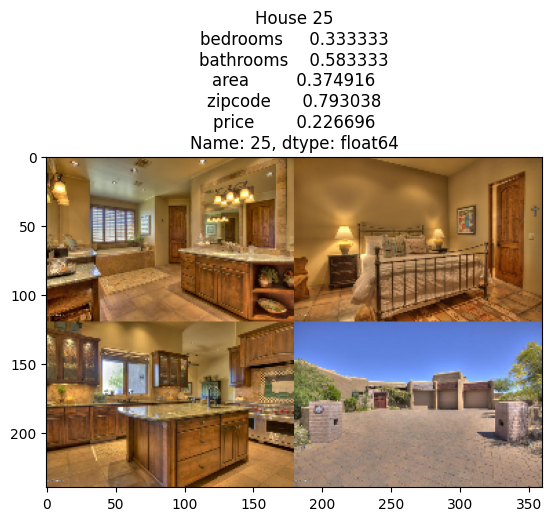

In [ ]:
import matplotlib.pyplot as plt

# Index of the house you want to visualize
house_to_visualize = 24  # To visualize the fourth house, index is 3

# Attributes of the house
house_attributes = df.iloc[house_to_visualize]

# Image of the house
house_image = images[house_to_visualize]

# Save the image with adjusted resolution
plt.imsave('house.png', house_image, dpi=300)

# Display the saved image
img = plt.imread('house.png')
plt.imshow(img)
plt.title(f'House {house_to_visualize + 1}\n{house_attributes}')
plt.show()

# Ensure that you use only as many samples as there are images
df = df.head(len(images))


In [ ]:
# Data partitioning
split = train_test_split(df, images, test_size=0.25, random_state=42)
(trainAttrX, testAttrX, trainImagesX, testImagesX) = split

# Normalize prices by the maximum price in the training set
maxPrice = trainAttrX["price"].max()
trainY = trainAttrX["price"] / maxPrice
testY = testAttrX["price"] / maxPrice


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, concatenate

# Exemple de données factices pour illustrer le modèle combiné
# Vous devriez remplacer ces données par vos propres données
np.random.seed(0)
trainAttrX = np.random.rand(100, 10)  # Exemple de données pour MLP
trainImagesX = np.random.rand(100, 120, 180, 3)  # Exemple de données pour CNN
trainY = np.random.rand(100, 1)  # Exemple de cibles pour la prédiction

# Définir la forme d'entrée pour MLP
mlp_input_shape = (trainAttrX.shape[1],)

# Définir le modèle MLP avec [8]
mlp_model = Sequential(name="mlp_model")
mlp_model.add(Dense(8, activation="relu", input_shape=mlp_input_shape, name="mlp_dense_layer1"))

# Définir la forme d'entrée pour CNN
cnn_input_shape = (120, 180, 3)

# Définir le modèle CNN avec [1, 2]
cnn_model = Sequential(name="cnn_model")
cnn_model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=cnn_input_shape))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())

# Combiner les sorties des modèles MLP et CNN
combined_output = concatenate([mlp_model.output, cnn_model.output])

# Couches denses finales
final_dense1 = Dense(4, activation="relu")(combined_output)
final_output = Dense(1, activation="relu")(final_dense1)

# Créer le modèle combiné avec les entrées et la sortie spécifiées
combined_model = Model(inputs=[mlp_model.input, cnn_model.input], outputs=final_output)

# Afficher un résumé du modèle combiné
combined_model.summary()





Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 conv2d_input (InputLayer)   [(None, 120, 180, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 120, 180, 32)         896       ['conv2d_input[0][0]']        
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 60, 90, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 60, 90, 64)           18496     ['max_pooling2d[0][0]']   

• Adjusting optimizer:Learning rate

Training with learning_rate = 0.001
Training with learning_rate = 0.01
Training with learning_rate = 0.1


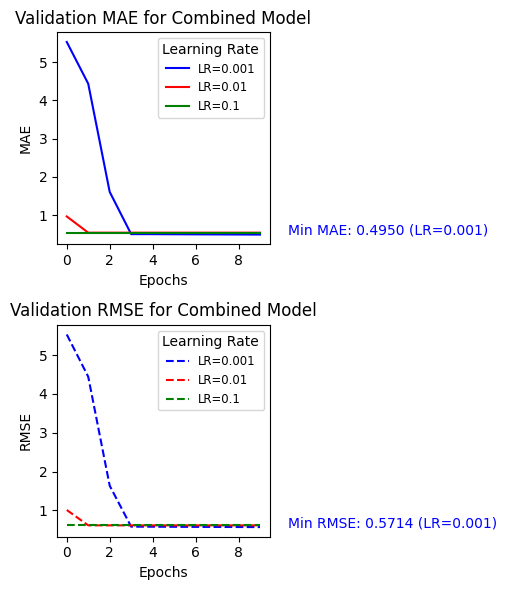

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, concatenate
from tensorflow.keras.optimizers import Adam
from skimage.transform import resize

# Sample data for illustration (replace with your actual data)
trainAttrX = np.random.rand(100, 10)  # Example: features for MLP
trainImagesX = np.random.rand(100, 240, 360, 3)  # Example: images for CNN
trainY = np.random.rand(100)  # Example: regression target

# Resize images for consistency (adjust dimensions as needed)
trainImagesX_resized = np.array([resize(img, (120, 180, 3)) for img in trainImagesX])

# Constants
batch_size = 32
learning_rates = [0.001, 0.01, 0.1]  # Different learning rates to try

# Dictionary to store training histories
histories = {}

# Create subplot for MAE and RMSE separately
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 6))

colors = ['blue', 'red', 'green']  # Colors for each learning rate

best_lr_mae = None
best_mae = float('inf')  # Initialize with infinity for MAE
best_lr_rmse = None
best_rmse = float('inf')  # Initialize with infinity for RMSE

for lr_idx, learning_rate in enumerate(learning_rates):
    print(f"Training with learning_rate = {learning_rate}")

    # Define MLP input shape
    mlp_input_shape = (trainAttrX.shape[1],)

    # Define MLP model
    mlp_model = Sequential(name="mlp_model")
    mlp_model.add(Dense(8, activation="relu", input_shape=mlp_input_shape, name="mlp_dense_layer1"))
    mlp_model.add(Dense(4, activation="relu", name="mlp_dense_layer2"))

    # Define CNN input shape
    cnn_input_shape = (120, 180, 3)

    # Define CNN model
    cnn_model = Sequential(name="cnn_model")
    cnn_model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=cnn_input_shape))
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(64, activation="relu"))

    # Concatenate MLP and CNN outputs
    combined_output = concatenate([mlp_model.output, cnn_model.output])

    # Final dense layers for combined model
    final_dense1 = Dense(16, activation="relu")(combined_output)
    final_output = Dense(1, activation="relu")(final_dense1)

    # Create combined model
    combined_model = Model(inputs=[mlp_model.input, cnn_model.input], outputs=final_output)

    # Compile the combined model with specified learning rate
    optimizer = Adam(learning_rate=learning_rate)
    combined_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])

    # Train the combined model
    history = combined_model.fit([trainAttrX, trainImagesX_resized], trainY, validation_split=0.2,
                                 epochs=10, batch_size=batch_size, verbose=0)

    # Store training history
    histories[learning_rate] = history

    # Get the minimum validation MAE and RMSE
    min_val_mae = np.min(history.history['val_mae'])
    min_val_rmse = np.min(np.sqrt(history.history['val_mse']))

    # Check if this model has the best MAE so far
    if min_val_mae < best_mae:
        best_mae = min_val_mae
        best_lr_mae = learning_rate

    # Check if this model has the best RMSE so far
    if min_val_rmse < best_rmse:
        best_rmse = min_val_rmse
        best_lr_rmse = learning_rate

    # Plot validation MAE for the current learning rate
    ax1.plot(history.history['val_mae'], label=f'LR={learning_rate}', color=colors[lr_idx])

    # Plot validation RMSE for the current learning rate
    ax2.plot(np.sqrt(history.history['val_mse']), label=f'LR={learning_rate}', linestyle='--', color=colors[lr_idx])

# Configure the first plot (MAE) with legend and no grid
ax1.set_title('Validation MAE for Combined Model')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MAE')
ax1.legend(loc='upper right', fontsize='small', title='Learning Rate')
ax1.grid(False)

# Annotate MAE plot with best MAE value and learning rate
ax1.annotate(f'Min MAE: {best_mae:.4f} (LR={best_lr_mae})', xy=(len(histories[best_lr_mae].history['val_mae']) - 1, best_mae),
             xytext=(20, 0), textcoords='offset points', fontsize=10, color=colors[learning_rates.index(best_lr_mae)])

# Configure the second plot (RMSE) with legend and no grid
ax2.set_title('Validation RMSE for Combined Model')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('RMSE')
ax2.legend(loc='upper right', fontsize='small', title='Learning Rate')
ax2.grid(False)

# Annotate RMSE plot with best RMSE value and learning rate
ax2.annotate(f'Min RMSE: {best_rmse:.4f} (LR={best_lr_rmse})', xy=(len(histories[best_lr_rmse].history['val_mse']) - 1, best_rmse),
             xytext=(20, 0), textcoords='offset points', fontsize=10, color=colors[learning_rates.index(best_lr_rmse)])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


.Deciding on the batch size

Training with batch_size = 16
Training with batch_size = 32
Training with batch_size = 64


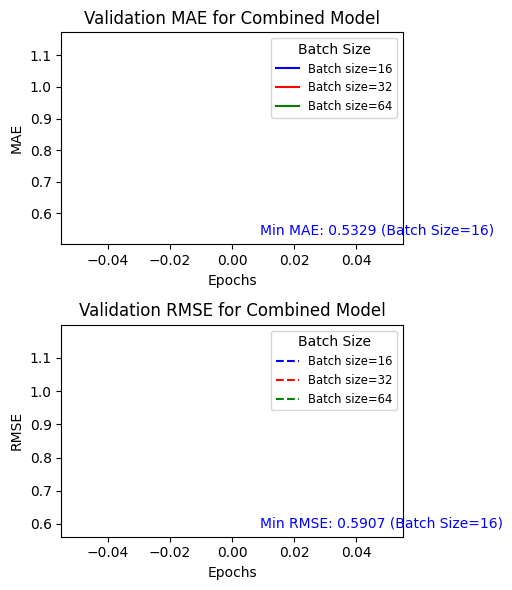

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, concatenate
from tensorflow.keras.optimizers import Adam
from skimage.transform import resize

# Sample data for illustration (replace with your actual data)
trainAttrX = np.random.rand(100, 10)  # Example: features for MLP
trainImagesX = np.random.rand(100, 240, 360, 3)  # Example: images for CNN
trainY = np.random.rand(100)  # Example: regression target

# Resize images for consistency (adjust dimensions as needed)
trainImagesX_resized = np.array([resize(img, (120, 180, 3)) for img in trainImagesX])

# Constants
learning_rate = 0.001
batch_sizes = [16, 32, 64]  # Different batch sizes to try

# Dictionary to store training histories
histories = {}

# Create subplot for MAE and RMSE separately
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 6))

colors = ['blue', 'red', 'green']  # Colors for each batch size

best_batch_mae = None
best_mae = float('inf')  # Initialize with infinity for MAE
best_batch_rmse = None
best_rmse = float('inf')  # Initialize with infinity for RMSE

for batch_idx, batch_size in enumerate(batch_sizes):
    print(f"Training with batch_size = {batch_size}")

    # Define MLP input shape
    mlp_input_shape = (trainAttrX.shape[1],)

    # Define MLP model
    mlp_model = Sequential(name="mlp_model")
    mlp_model.add(Dense(8, activation="relu", input_shape=mlp_input_shape, name="mlp_dense_layer1"))
    mlp_model.add(Dense(4, activation="relu", name="mlp_dense_layer2"))

    # Define CNN input shape
    cnn_input_shape = (120, 180, 3)

    # Define CNN model
    cnn_model = Sequential(name="cnn_model")
    cnn_model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=cnn_input_shape))
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(64, activation="relu"))

    # Concatenate MLP and CNN outputs
    combined_output = concatenate([mlp_model.output, cnn_model.output])

    # Final dense layers for combined model
    final_dense1 = Dense(16, activation="relu")(combined_output)
    final_output = Dense(1, activation="relu")(final_dense1)

    # Create combined model
    combined_model = Model(inputs=[mlp_model.input, cnn_model.input], outputs=final_output)

    # Compile the combined model with specified learning rate
    optimizer = Adam(learning_rate=learning_rate)
    combined_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])

    # Train the combined model
    history = combined_model.fit([trainAttrX, trainImagesX_resized], trainY, validation_split=0.2,
                                 epochs=1, batch_size=batch_size, verbose=0)

    # Store training history
    histories[batch_size] = history

    # Get the minimum validation MAE and RMSE
    min_val_mae = np.min(history.history['val_mae'])
    min_val_rmse = np.min(np.sqrt(history.history['val_mse']))

    # Check if this model has the best MAE so far
    if min_val_mae < best_mae:
        best_mae = min_val_mae
        best_batch_mae = batch_size

    # Check if this model has the best RMSE so far
    if min_val_rmse < best_rmse:
        best_rmse = min_val_rmse
        best_batch_rmse = batch_size

    # Plot validation MAE for the current batch size
    ax1.plot(history.history['val_mae'], label=f'Batch size={batch_size}', color=colors[batch_idx])

    # Plot validation RMSE for the current batch size
    ax2.plot(np.sqrt(history.history['val_mse']), label=f'Batch size={batch_size}', linestyle='--', color=colors[batch_idx])

# Configure the first plot (MAE) with legend and no grid
ax1.set_title('Validation MAE for Combined Model')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MAE')
ax1.legend(loc='upper right', fontsize='small', title='Batch Size')
ax1.grid(False)

# Annotate MAE plot with best MAE value and batch size
ax1.annotate(f'Min MAE: {best_mae:.4f} (Batch Size={best_batch_mae})', xy=(len(histories[best_batch_mae].history['val_mae']) - 1, best_mae),
             xytext=(20, 0), textcoords='offset points', fontsize=10, color=colors[batch_sizes.index(best_batch_mae)])

# Configure the second plot (RMSE) with legend and no grid
ax2.set_title('Validation RMSE for Combined Model')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('RMSE')
ax2.legend(loc='upper right', fontsize='small', title='Batch Size')
ax2.grid(False)

# Annotate RMSE plot with best RMSE value and batch size
ax2.annotate(f'Min RMSE: {best_rmse:.4f} (Batch Size={best_batch_rmse})', xy=(len(histories[best_batch_rmse].history['val_mse']) - 1, best_rmse),
             xytext=(20, 0), textcoords='offset points', fontsize=10, color=colors[batch_sizes.index(best_batch_rmse)])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

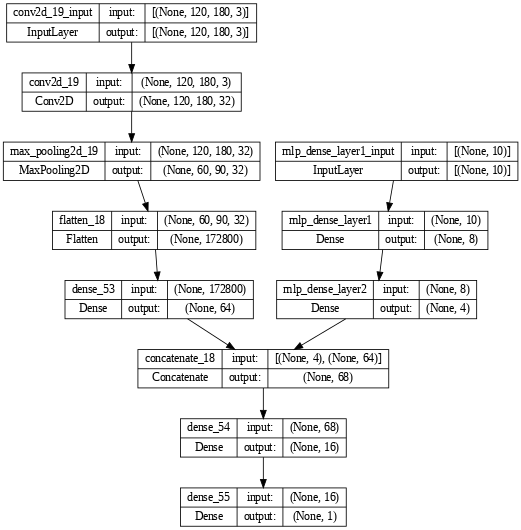

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot the combined model architecture with a smaller figure size
plot_model(combined_model, to_file='combined_model_architecture.png', show_shapes=True, show_layer_names=True, dpi=60)


In [ ]:
os.getcwd()

'/content'